In [2]:
import random
import numpy as np
from data_process import get_CIFAR10_data
from scipy.spatial import distance
%matplotlib inline
from save_submission import output_submission_csv
import matplotlib.pyplot as plt
import warnings



# Loading CIFAR-10

In the following cells we determine the number of images for each split and load the images.
<br /> 
TRAIN_IMAGES + VAL_IMAGES = (0, 50000]
, TEST_IMAGES = 10000

In [3]:
# You can change these numbers for experimentation
# For submission we will use the default values 
TRAIN_IMAGES = 40000
VAL_IMAGES = 10000


In [4]:
data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES)
X_train_CIFAR, y_train_CIFAR = data['X_train'], data['y_train']
X_val_CIFAR, y_val_CIFAR = data['X_val'], data['y_val']
X_test_CIFAR, y_test_CIFAR = data['X_test'], data['y_test']
n_class_CIFAR = len(np.unique(y_test_CIFAR))
list_of_classes = np.unique(y_test_CIFAR)
#Code to preview the image 
#plt.imshow(data['X_train'][0][0, 0:32, 0:32])


Convert the sets of images from dimensions of **(N, 3, 32, 32) -> (N, 3072)** where N is the number of images so that each **3x32x32** image is represented by a single vector.

In [5]:
X_train_CIFAR = np.reshape(X_train_CIFAR, (X_train_CIFAR.shape[0], -1))
X_val_CIFAR = np.reshape(X_val_CIFAR, (X_val_CIFAR.shape[0], -1))
X_test_CIFAR = np.reshape(X_test_CIFAR, (X_test_CIFAR.shape[0], -1))

# Perceptron

Perceptron has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according the perceptron update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Perceptron classifier in the **models/Perceptron.py**

The following code: 
- Creates an instance of the Perceptron classifier class 
- The train function of the Perceptron class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy


# Model Perceptron

In [6]:
import numpy as np


class Perceptron:
    def __init__(self, n_class: int, lr: float, epochs: int):
        """Initialize a new classifier.
        Parameters:
            n_class: the number of classes
            lr: the learning rate
            epochs: the number of epochs to train for
        """ 
        self.w = np.zeros((y_train_CIFAR.shape[0], X_train_CIFAR.shape[1])) ###### TODO: change this
        self.lr = lr ###### TODO: change this
        self.epochs = epochs ###### TODO: change this
        self.n_class = n_class ###### TODO: change this
        self.classes = list(range(10))

    def train(self, X_train: np.ndarray, y_train: np.ndarray):
        """Train the classifier.
        Use the perceptron update rule as introduced in Lecture 3.
        Parameters:
            X_train: a number array of shape (N, D) containing training data;
                N examples with D dimensions
            y_train: a numpy array of shape (N,) containing training labels
        """
        # N, D = X_train.shape
        # self.w = np.random.randn(self.n_class, D)
        ###### YOUR CODE STARTS HERE ######
        for _ in range(self.epochs):
            for category, feature_dict in zip(y_train, X_train):
                # Format feature values as a vector, with extra BIAS term.
                feature_list = feature_dict
                feature_vector = np.array(feature_list)

                # Initialize arg_max value, predicted class.
                arg_max, predicted_class = 0, self.classes[0]
                # print(arg_max)
                # Multi-Class Decision Rule:
                for c in self.classes:
                    current_activation = np.dot(feature_vector, self.w[c])
                    if current_activation >= arg_max:
                        arg_max, predicted_class = current_activation, c

                # Update Rule:
                if not (category == predicted_class):
                    self.w[category] += self.lr*feature_vector
                    self.w[predicted_class] -= self.lr*feature_vector
        
        ###### YOUR CODE ENDS HERE ######
        pass

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        """Use the trained weights to predict labels for test data points.
        Parameters:
            X_test: a numpy array of shape (N, D) containing testing data;
                N examples with D dimensions
        Returns:
            predicted labels for the data in X_test; a 1-dimensional array of
                length N, where each element is an integer giving the predicted
                class.
        """
        N, D = X_test.shape
        y_test = np.zeros(N)
        # print(X_test.shape[0])
        # print(len(y_test))
        ###### YOUR CODE STARTS HERE ######
        for i in range(X_test.shape[0]):
            max = 0
            for j in range(n_class_CIFAR):
                predict = np.dot(self.w[j], X_test[i,:]) #Samplewise prediction
                if predict > max:
                    y_test[i] = j
                    max = predict
                    # break
        ###### YOUR CODE ENDS HERE ######
        return y_test

## Train Perceptron on CIFAR

In [46]:
lr = 0.2
n_epochs = 10

percept_CIFAR = Perceptron(n_class_CIFAR, lr, n_epochs)
percept_CIFAR.train(X_train_CIFAR, y_train_CIFAR)

In [47]:
def get_acc(predictedclass,Y_val):
    error = 0
    numsamples = predictedclass.shape[0]
    for i in range(numsamples):
        predicted_class = predictedclass[i]
        if Y_val[i] != predicted_class:
             error+=1
    return (1 - error/numsamples)


pred_percept = percept_CIFAR.predict(X_train_CIFAR)
print('The training accuracy is given by: %f' % (get_acc(pred_percept, y_train_CIFAR)))

The training accuracy is given by: 0.308475


### Validate Perceptron on CIFAR

In [48]:
pred_percept = percept_CIFAR.predict(X_val_CIFAR)
print('The validation accuracy is given by: %f' % (get_acc(pred_percept, y_val_CIFAR)))

The validation accuracy is given by: 0.274400


### Test Perceptron on CIFAR

In [37]:
pred_percept = percept_CIFAR.predict(X_test_CIFAR)
print('The testing accuracy is given by: %f' % (get_acc(pred_percept, y_test_CIFAR)))

The testing accuracy is given by: 0.259600


In [11]:
output_submission_csv('output/Perceptron_submission_CIFAR.csv', percept_CIFAR.predict(X_test_CIFAR))

# Logistic Classifier

The Logistic Classifier has 2 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Number of Epochs** - As described for perceptron.



You will implement the Logistic Classifier in the **models/Logistic.py**

The following code: 
- Creates an instance of the Logistic classifier class 
- The train function of the Logistic class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

In [12]:
"""Logistic regression model."""

import numpy as np
import math


class Logistic:
    def __init__(self, lr: float, epochs: int):
        """Initialize a new classifier.
        Parameters:
            lr: the learning rate
            epochs: the number of epochs to train for
        """
        self.w = np.zeros((y_train_CIFAR.shape[0], X_train_CIFAR.shape[1])) ###### 
        self.lr = lr###### TODO: change this
        self.epochs = epochs###### TODO: change this
        self.threshold = 0.3###### TODO: change this
        self.b = 0

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        """Sigmoid function.
        Parameters:
            z: the input
        Returns:
            the sigmoid of the input
        """
        warnings.filterwarnings('ignore')
        ##### YOUR CODE STARTS HERE #####
        return 1.0/(1 + np.exp(-z))
        ##### YOUR CODE ENDS HERE #####
    
    def loss(self, y, y_hat):
        loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss

    def gradient_descent(self, X, y, theta, alpha, epochs):
        m = len(X)
        for i in range(0, epochs):
            h = self.sigmoid(np.dot(X, theta))
            # for i in range(0, len(X)):
            theta -= (alpha/m) * np.sum((h-y)*X)
        return theta

    def train(self, X_train: np.ndarray, y_train: np.ndarray):
        """Train the classifier.
        Use the logistic regression update rule as introduced in lecture.
        Parameters:
            X_train: a numpy array of shape (N, D) containing training data;
                N examples with D dimensions
            y_train: a numpy array of shape (N,) containing training labels
        """
        N, D = X_train.shape

        ##### YOUR CODE STARTS HERE #####    
        # Initializing weights and bias to zeros.
        self.w = np.random.randn(n_class_CIFAR, D)
        for i in range(N):
            self.w[y_train[i]] = self.gradient_descent(X_train[i], y_train[i], self.w[y_train[i]], self.lr, self.epochs)          
        ##### YOUR CODE ENDS HERE #####

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        """Use the trained weights to predict labels for test data points.
        Parameters:
            X_test: a numpy array of shape (N, D) containing testing data;
                N examples with D dimensions
        Returns:
            predicted labels for the data in X_test; a 1-dimensional array of
                length N, where each element is an integer giving the predicted
                class.
        """
        ##### YOUR CODE STARTS HERE #####
        predict = []
        for i in range(len(X_test)):
            h = []
            class_now = 0
            max_now = 0.5
            for j in range(n_class_CIFAR):
                h = self.sigmoid(np.dot(X_test[i], self.w[j] ))
                if h >= max_now:
                    class_now = j
                    # predict.append(j)
                    # break
            # if len(predict) != i+1:
            predict.append(class_now)
        return predict
        ##### YOUR CODE ENDS HERE #####


### Training Logistic Classifer

In [58]:
learning_rate = 0.2
n_epochs = 15

lr = Logistic(learning_rate, n_epochs)
lr.train(X_train_CIFAR, y_train_CIFAR)

In [59]:
pred_lr = np.array(lr.predict(X_train_CIFAR))
print('The training accuracy is given by: %f' % (get_acc(pred_lr, y_train_CIFAR)))

The training accuracy is given by: 0.105825


### Validate Logistic Classifer

In [60]:
pred_lr = np.array(lr.predict(X_val_CIFAR))
print('The validation accuracy is given by: %f' % (get_acc(pred_lr, y_val_CIFAR)))

The validation accuracy is given by: 0.106900


### Test Logistic Classifier

In [16]:
pred_lr = np.array(lr.predict(X_test_CIFAR))
print('The testing accuracy is given by: %f' % (get_acc(pred_lr, y_test_CIFAR)))

lr

output_submission_csv('output/Logistic_submission_CIFAR.csv', lr.predict(X_test_CIFAR))

The testing accuracy is given by: 0.108900


D) Weights and Feature vector for both the model.


In [17]:
print("Weights for Perceptron")
print(percept_CIFAR.w)
print("Weights for Logistic Classifier")
print(lr.w)

Weights for Perceptron
[[  -41.5883     -85.12448  -1302.65336  ...   219.13122    255.2608
   -779.03464 ]
 [  853.0508   -1038.99552   -373.13664  ...   330.11128    108.9392
    188.82464 ]
 [  117.103925  1371.16448   1345.69586  ...  -307.550595 -1276.6608
   -942.95786 ]
 ...
 [    0.           0.           0.       ...     0.           0.
      0.      ]
 [    0.           0.           0.       ...     0.           0.
      0.      ]
 [    0.           0.           0.       ...     0.           0.
      0.      ]]
Weights for Logistic Classifier
[[ 1.64945160e+00 -4.40713009e-01 -7.22998973e-01 ... -6.14265035e-02
  -1.90770204e+00 -3.44331859e-01]
 [ 5.95179961e-01 -2.42850057e-02 -9.74815725e-02 ... -4.98956454e-01
  -1.85351824e-01 -7.00585170e-01]
 [-7.25095146e+01 -7.45673078e+01 -7.25316348e+01 ... -7.25233536e+01
  -7.28615967e+01 -7.37853822e+01]
 ...
 [-1.14182237e+04 -1.14172437e+04 -1.14174503e+04 ... -1.14187791e+04
  -1.14165100e+04 -1.14186146e+04]
 [ 3.40427004e+0

The weights for Perceptron are having big values, and also there is a lot of variance between the weights for each model to predict. 

We know that both models minimize a spefic loss function. 

The Perceptron minimize the mean error, this model will create weights to create the best classification that is more inclined to keep the datapoints in the selected region for classification. 


The Logistic regression will minimize the loss function which exponential to the weights, so a small difference in the weight will be efficient to create classification of data points. 

F) BONUS

Perceptron

Based on different, epochs the accuracy changes as below.

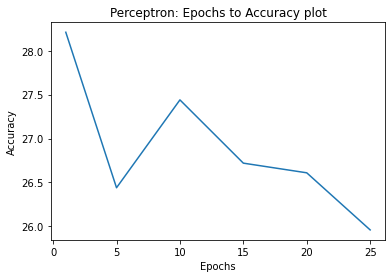

In [63]:
epochs = [1, 5, 10, 15, 20, 25]
accuracy = [28.2100, 26.4400, 27.4400, 26.7200, 26.6100, 25.9600]

plt.plot(epochs, accuracy)
 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Perceptron: Epochs to Accuracy plot')
 
# function to show the plot
plt.show()

Logistic Classification

Based on different, epochs the accuracy changes as below.

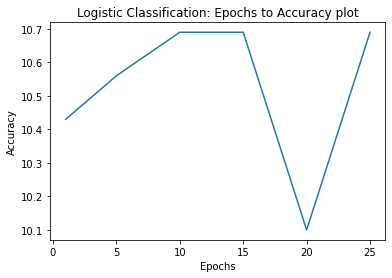

In [62]:
epochs = [1, 5, 10, 15, 20, 25]
accuracy = [10.4300, 10.5600, 10.6900, 10.6900, 10.100, 10.69]

plt.plot(epochs, accuracy)
 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Logistic Classification: Epochs to Accuracy plot')
 
# function to show the plot
plt.show()